In [6]:
# Python
import pandas as pd
from prophet import Prophet

In [7]:
df = pd.read_csv('./CSV/df_btc.csv')
df.head()

,Date,Close,High,Low,Open,Volume
0,2020-02-12,10326.054688,10393.611328,10202.387695,10202.387695,43444303830
1,2020-02-13,10214.379883,10457.626953,10116.161133,10323.960938,49356071373
2,2020-02-14,10312.116211,10321.996094,10125.534180,10211.550781,43338264162
3,2020-02-15,9889.424805,10341.555664,9874.427734,10313.856445,43865054831
4,2020-02-16,9934.433594,10053.968750,9722.386719,9889.179688,43374780305


In [8]:
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True) #renaming for prophet
df.head()

,ds,y,High,Low,Open,Volume
0,2020-02-12,10326.054688,10393.611328,10202.387695,10202.387695,43444303830
1,2020-02-13,10214.379883,10457.626953,10116.161133,10323.960938,49356071373
2,2020-02-14,10312.116211,10321.996094,10125.534180,10211.550781,43338264162
3,2020-02-15,9889.424805,10341.555664,9874.427734,10313.856445,43865054831
4,2020-02-16,9934.433594,10053.968750,9722.386719,9889.179688,43374780305


In [9]:
# Fit the model
m = Prophet()
m.fit(df)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

20:27:59 - cmdstanpy - INFO - Chain [1] start processing
20:28:00 - cmdstanpy - INFO - Chain [1] done processing


,ds
2188,2026-02-08
2189,2026-02-09
2190,2026-02-10
2191,2026-02-11
2192,2026-02-12


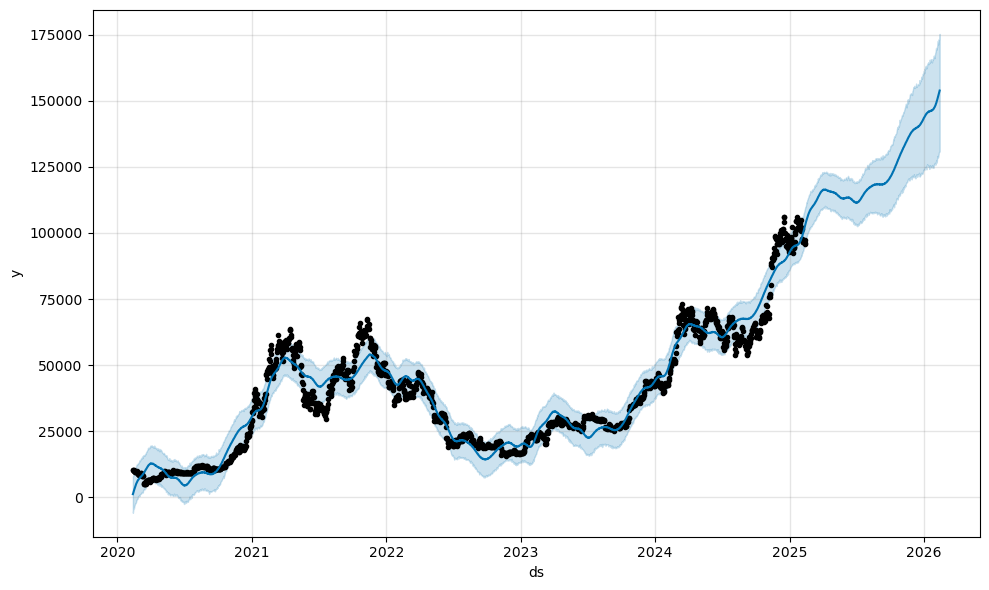

In [10]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# Python
fig1 = m.plot(forecast)





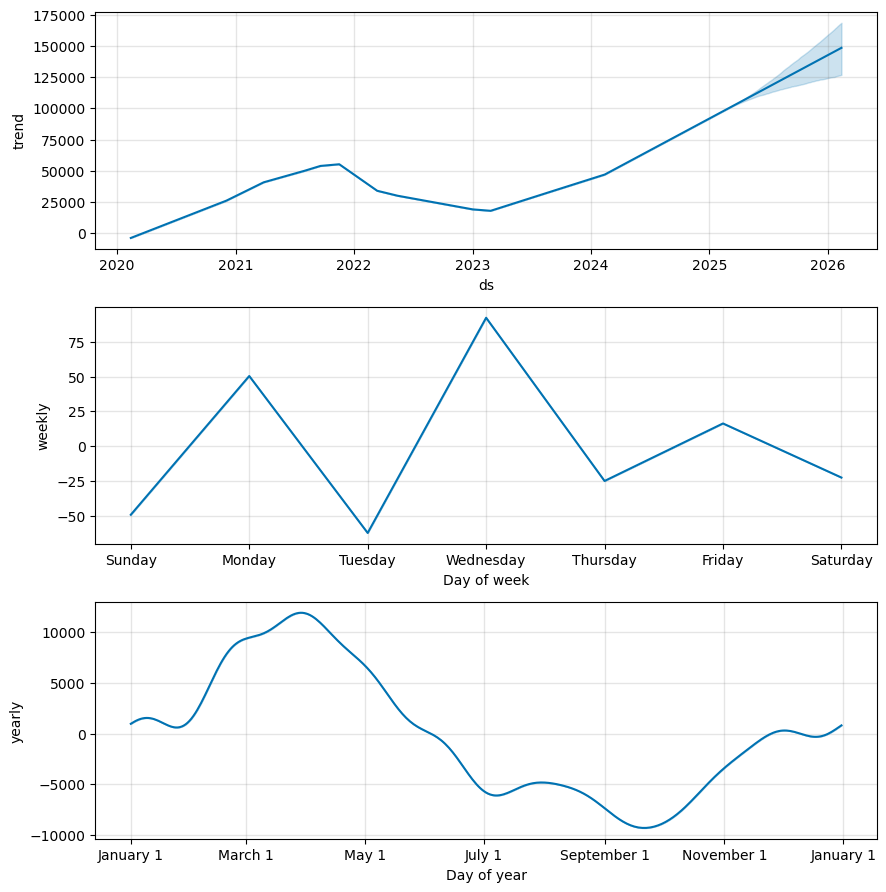

In [11]:
# Python
fig2 = m.plot_components(forecast)



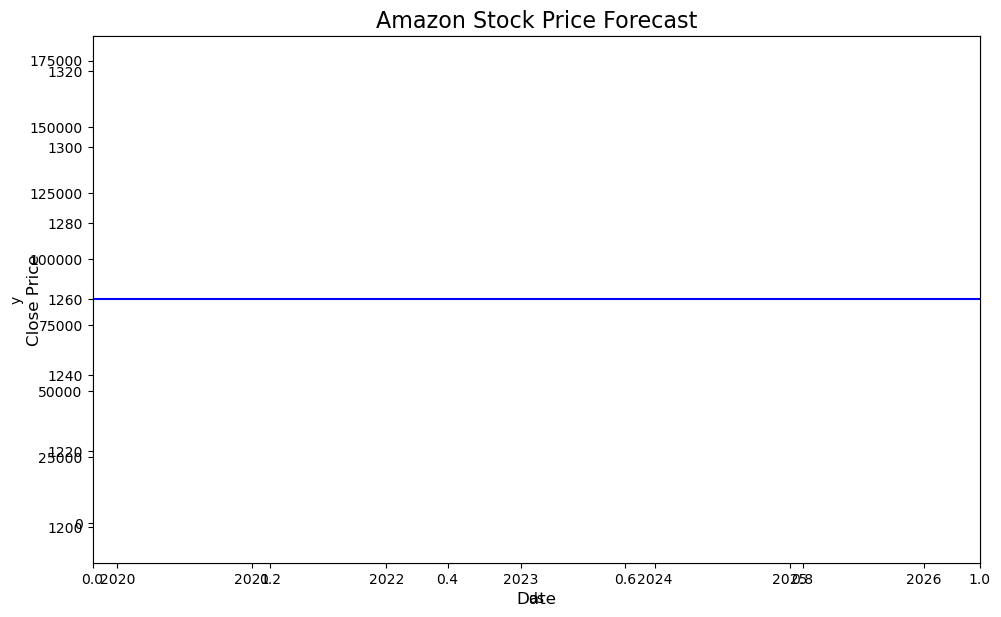

In [12]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt


# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

In [13]:
# Add imports
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# After the forecast is generated, add candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['ds'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['y'])])

fig.update_layout(title='BTC Price History',
                 yaxis_title='Price',
                 xaxis_title='Date')
fig.show()

# Add performance metrics
# Calculate errors on the training data
y_true = df['y'].values
y_pred = forecast['yhat'][:len(y_true)]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"""Model Performance Metrics:
MAE: ${mae:.2f}
RMSE: ${rmse:.2f}
MAPE: {mape:.2f}%""")

# Cross-validation
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print("\nCross Validation Metrics:")
print(df_p[['horizon', 'mae', 'rmse', 'mape']].tail())

Model Performance Metrics:
MAE: $4032.09
RMSE: $5089.99
MAPE: 14.42%


  0%|          | 0/5 [00:00<?, ?it/s]

20:28:03 - cmdstanpy - INFO - Chain [1] start processing
20:28:04 - cmdstanpy - INFO - Chain [1] done processing
20:28:04 - cmdstanpy - INFO - Chain [1] start processing
20:28:04 - cmdstanpy - INFO - Chain [1] done processing
20:28:04 - cmdstanpy - INFO - Chain [1] start processing
20:28:04 - cmdstanpy - INFO - Chain [1] done processing
20:28:04 - cmdstanpy - INFO - Chain [1] start processing
20:28:05 - cmdstanpy - INFO - Chain [1] done processing
20:28:05 - cmdstanpy - INFO - Chain [1] start processing
20:28:05 - cmdstanpy - INFO - Chain [1] done processing



Cross Validation Metrics:
     horizon           mae          rmse      mape
324 361 days  25272.776024  27838.804756  0.632376
325 362 days  25203.739754  27761.186247  0.631420
326 363 days  25117.198978  27683.576858  0.630019
327 364 days  25002.884401  27592.814703  0.628138
328 365 days  24913.817020  27525.604916  0.626423


In [14]:
# Import required libraries
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load the Bitcoin data
df = pd.read_csv('./CSV/df_btc.csv')

# Convert to datetime and rename columns
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Split data into train and test (80-20 split)
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Model Configuration
m = Prophet(
    changepoint_prior_scale=0.15,  # Augmentation de la flexibilité des changepoints
    seasonality_mode='multiplicative',  # Mode saisonnier multiplicatif
    yearly_seasonality=20,           # Fourier terms pour la saisonnalité annuelle
    weekly_seasonality=15,           # Fourier terms pour la saisonnalité hebdomadaire
    daily_seasonality=False,         # Désactivé pour les données quotidiennes
    n_changepoints=200               # Augmentation du nombre de points de changement
)

# Add seasonalities
m.add_seasonality(name='monthly', period=30.5, fourier_order=10)

# Model Training
m.fit(train)

# Cross-validation
df_cv = cross_validation(
    m,
    initial='730 days',  # Période d'entraînement initiale (2 ans)
    period='180 days',   # Période entre les splits (6 mois)
    horizon='90 days'    # Période de prévision (3 mois)
)

# Calculate performance metrics
df_p = performance_metrics(df_cv)

# Display performance metrics
print("\nPerformance Metrics:")
print(df_p[['horizon', 'mae', 'rmse', 'mape']].tail())

# Calculate average metrics
average_mae = df_p['mae'].mean()
average_rmse = df_p['rmse'].mean()
average_mape = df_p['mape'].mean() * 100

print(f"\nAverage Metrics:")
print(f"MAE: {average_mae:.2f}")
print(f"RMSE: {average_rmse:.2f}")
print(f"MAPE: {average_mape:.2f}%")

# Final forecast with full data
m_full = Prophet(
    changepoint_prior_scale=0.15,
    seasonality_mode='multiplicative',
    yearly_seasonality=20,
    weekly_seasonality=15,
    daily_seasonality=False,
    n_changepoints=200
).fit(df)

future = m_full.make_future_dataframe(periods=365)
forecast = m_full.predict(future)

# Plotting
fig = go.Figure()

# Actual data
fig.add_trace(go.Scatter(
    x=df['ds'], 
    y=df['y'], 
    mode='lines', 
    name='Historical Data',
    line=dict(color='#1f77b4')
))

# Forecast
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat'], 
    mode='lines', 
    name='Forecast',
    line=dict(color='#ff7f0e')))
    
# Uncertainty interval
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    fill=None,
    mode='lines',
    line=dict(color='rgba(255,127,14,0.1)'),
    name='Upper Bound'))

fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    fill='tonexty',
    mode='lines',
    line=dict(color='rgba(255,127,14,0.1)'),
    name='Lower Bound'))

# Test data comparison
fig.add_trace(go.Scatter(
    x=test['ds'], 
    y=test['y'], 
    mode='markers', 
    name='Test Data',
    marker=dict(color='#2ca02c', size=4)))
    
fig.update_layout(
    title='Bitcoin Price Forecast with Uncertainty',
    xaxis_title='Date',
    yaxis_title='Price',
    hovermode='x unified',
    showlegend=True
)

fig.show()

20:28:05 - cmdstanpy - INFO - Chain [1] start processing
20:28:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

20:28:09 - cmdstanpy - INFO - Chain [1] start processing
20:28:11 - cmdstanpy - INFO - Chain [1] done processing
20:28:11 - cmdstanpy - INFO - Chain [1] start processing
20:28:13 - cmdstanpy - INFO - Chain [1] done processing
20:28:13 - cmdstanpy - INFO - Chain [1] start processing
20:28:16 - cmdstanpy - INFO - Chain [1] done processing
20:28:16 - cmdstanpy - INFO - Chain [1] start processing
20:28:19 - cmdstanpy - INFO - Chain [1] done processing
20:28:19 - cmdstanpy - INFO - Chain [1] start processing



Performance Metrics:
   horizon           mae          rmse      mape
77 86 days  10475.445521  12104.726246  0.391587
78 87 days  10670.683475  12285.486068  0.397345
79 88 days  10994.113883  12630.137188  0.408499
80 89 days  11284.063490  12931.137111  0.419250
81 90 days  11659.701845  13361.446632  0.431060

Average Metrics:
MAE: 7239.69
RMSE: 8123.11
MAPE: 28.00%


20:28:23 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# Import required libraries
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import plotly.graph_objects as go

# Load the S&P 500 data
df = pd.read_csv('./CSV/df_sp500.csv')

# Convert to datetime and rename columns
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Close': 'y'}).sort_values('ds')

# Split data into train and test (last 20% as test set)
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Model Configuration optimized for stock indices
m = Prophet(
    changepoint_prior_scale=0.05,  # Reduced for less sensitive changepoints
    seasonality_mode='multiplicative',
    yearly_seasonality=15,
    weekly_seasonality=5,          # Adjusted for business weeks
    daily_seasonality=False,
    n_changepoints=150,            # Reduced number of changepoints
    changepoint_range=0.95         # Focus on recent 95% of data
)

# Add custom seasonalities for financial markets
m.add_seasonality(
    name='quarterly', 
    period=91.25, 
    fourier_order=8, 
    prior_scale=0.1
)

m.add_seasonality(
    name='monthly', 
    period=30.5, 
    fourier_order=5, 
    prior_scale=0.1
)

# Model Training
m.fit(train)

# Cross-validation with adjusted parameters
df_cv = cross_validation(
    m,
    initial='730 days',   # 2 years training
    period='90 days',     # Quarterly evaluation periods
    horizon='180 days'    # 6 months forecast evaluation
)

# Calculate performance metrics
df_p = performance_metrics(df_cv)

# Display performance metrics
print("\nPerformance Metrics:")
print(df_p[['horizon', 'mae', 'rmse', 'mape']].tail())

# Calculate average metrics
average_mae = df_p['mae'].mean()
average_rmse = df_p['rmse'].mean()
average_mape = df_p['mape'].mean() * 100

print(f"\nAverage Metrics:")
print(f"MAE: {average_mae:.2f}")
print(f"RMSE: {average_rmse:.2f}")
print(f"MAPE: {average_mape:.2f}%")

# Test set evaluation
future = m.make_future_dataframe(periods=len(test))
forecast = m.predict(future)

# Merge actual values
test_forecast = forecast.iloc[train_size:].merge(test, on='ds')

# Calculate test metrics
test_mae = (test_forecast['yhat'] - test_forecast['y']).abs().mean()
test_rmse = ((test_forecast['yhat'] - test_forecast['y'])**2).mean()**0.5
test_mape = ((test_forecast['yhat'] - test_forecast['y']).abs() / test_forecast['y']).mean() * 100

print(f"\nTest Set Metrics:")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")

# Final model with full data
m_full = Prophet(
    changepoint_prior_scale=0.05,
    seasonality_mode='multiplicative',
    yearly_seasonality=15,
    weekly_seasonality=5,
    daily_seasonality=False,
    n_changepoints=150,
    changepoint_range=0.95
).fit(df)

future = m_full.make_future_dataframe(periods=365)
forecast = m_full.predict(future)

# Plotting
fig = go.Figure()

# Historical data
fig.add_trace(go.Scatter(
    x=df['ds'], 
    y=df['y'], 
    mode='lines', 
    name='Historical Data',
    line=dict(color='#1f77b4', width=1.5)
))

# Forecast
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat'], 
    mode='lines', 
    name='Forecast',
    line=dict(color='#d62728', width=2, dash='dot')))
    
# Uncertainty interval
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    mode='lines',
    line=dict(color='rgba(214,39,40,0.2)'),
    name='Upper Bound'))

fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    fill='tonexty',
    mode='lines',
    line=dict(color='rgba(214,39,40,0.2)'),
    name='Lower Bound'))

# Test data
fig.add_trace(go.Scatter(
    x=test['ds'], 
    y=test['y'], 
    mode='markers', 
    name='Actual Values',
    marker=dict(color='#2ca02c', size=4)))
    
fig.update_layout(
    title='S&P 500 Price Forecast with 95% Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    hovermode='x unified',
    legend=dict(orientation="h", yanchor="bottom", y=1.02),
    template='plotly_white'
)

fig.show()

20:28:23 - cmdstanpy - INFO - Chain [1] start processing
20:28:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/7 [00:00<?, ?it/s]

20:28:25 - cmdstanpy - INFO - Chain [1] start processing
20:28:26 - cmdstanpy - INFO - Chain [1] done processing
20:28:26 - cmdstanpy - INFO - Chain [1] start processing
20:28:27 - cmdstanpy - INFO - Chain [1] done processing
20:28:27 - cmdstanpy - INFO - Chain [1] start processing
20:28:28 - cmdstanpy - INFO - Chain [1] done processing
20:28:28 - cmdstanpy - INFO - Chain [1] start processing
20:28:29 - cmdstanpy - INFO - Chain [1] done processing
20:28:30 - cmdstanpy - INFO - Chain [1] start processing
20:28:31 - cmdstanpy - INFO - Chain [1] done processing
20:28:31 - cmdstanpy - INFO - Chain [1] start processing
20:28:33 - cmdstanpy - INFO - Chain [1] done processing
20:28:33 - cmdstanpy - INFO - Chain [1] start processing
20:28:35 - cmdstanpy - INFO - Chain [1] done processing



Performance Metrics:
     horizon         mae         rmse      mape
157 176 days  691.614627  1065.695189  0.171482
158 177 days  677.882062  1051.289455  0.167526
159 178 days  645.434802  1015.669317  0.158845
160 179 days  634.452873  1004.490468  0.155778
161 180 days  658.289559  1031.413121  0.161540

Average Metrics:
MAE: 500.32
RMSE: 676.75
MAPE: 12.45%

Test Set Metrics:
Test MAE: 191.77
Test RMSE: 241.33
Test MAPE: 3.59%


20:28:35 - cmdstanpy - INFO - Chain [1] start processing
20:28:37 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Import required libraries
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load the Bitcoin data
df = pd.read_csv('./CSV/df_gold.csv')

# Convert to datetime and rename columns
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Split data into train and test (80-20 split)
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Model Configuration
m = Prophet(
    changepoint_prior_scale=0.15,  # Augmentation de la flexibilité des changepoints
    seasonality_mode='multiplicative',  # Mode saisonnier multiplicatif
    yearly_seasonality=20,           # Fourier terms pour la saisonnalité annuelle
    weekly_seasonality=15,           # Fourier terms pour la saisonnalité hebdomadaire
    daily_seasonality=False,         # Désactivé pour les données quotidiennes
    n_changepoints=200               # Augmentation du nombre de points de changement
)

# Add seasonalities
m.add_seasonality(name='monthly', period=30.5, fourier_order=10)

# Model Training
m.fit(train)

# Cross-validation
df_cv = cross_validation(
    m,
    initial='730 days',  # Période d'entraînement initiale (2 ans)
    period='180 days',   # Période entre les splits (6 mois)
    horizon='90 days'    # Période de prévision (3 mois)
)

# Calculate performance metrics
df_p = performance_metrics(df_cv)

# Display performance metrics
print("\nPerformance Metrics:")
print(df_p[['horizon', 'mae', 'rmse', 'mape']].tail())

# Calculate average metrics
average_mae = df_p['mae'].mean()
average_rmse = df_p['rmse'].mean()
average_mape = df_p['mape'].mean() * 100

print(f"\nAverage Metrics:")
print(f"MAE: {average_mae:.2f}")
print(f"RMSE: {average_rmse:.2f}")
print(f"MAPE: {average_mape:.2f}%")

# Final forecast with full data
m_full = Prophet(
    changepoint_prior_scale=0.15,
    seasonality_mode='multiplicative',  
    yearly_seasonality=20,
    weekly_seasonality=15,
    daily_seasonality=False,
    n_changepoints=200
).fit(df)

future = m_full.make_future_dataframe(periods=365)
forecast = m_full.predict(future)

# Plotting
fig = go.Figure()

# Actual data
fig.add_trace(go.Scatter(
    x=df['ds'], 
    y=df['y'], 
    mode='lines', 
    name='Historical Data',
    line=dict(color='#1f77b4')
))

# Forecast
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat'], 
    mode='lines', 
    name='Forecast',
    line=dict(color='#ff7f0e')))
    
# Uncertainty interval
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    fill=None,
    mode='lines',
    line=dict(color='rgba(255,127,14,0.1)'),
    name='Upper Bound'))

fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    fill='tonexty',
    mode='lines',
    line=dict(color='rgba(255,127,14,0.1)'),
    name='Lower Bound'))

# Test data comparison
fig.add_trace(go.Scatter(
    x=test['ds'], 
    y=test['y'], 
    mode='markers', 
    name='Test Data',
    marker=dict(color='#2ca02c', size=4)))
    
fig.update_layout(
    title='Bitcoin Price Forecast with Uncertainty',
    xaxis_title='Date',
    yaxis_title='Price',
    hovermode='x unified',
    showlegend=True
)

fig.show()

20:28:37 - cmdstanpy - INFO - Chain [1] start processing
20:28:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

20:28:40 - cmdstanpy - INFO - Chain [1] start processing
20:28:41 - cmdstanpy - INFO - Chain [1] done processing
20:28:41 - cmdstanpy - INFO - Chain [1] start processing
20:28:43 - cmdstanpy - INFO - Chain [1] done processing
20:28:43 - cmdstanpy - INFO - Chain [1] start processing
20:28:45 - cmdstanpy - INFO - Chain [1] done processing
20:28:45 - cmdstanpy - INFO - Chain [1] start processing
20:28:47 - cmdstanpy - INFO - Chain [1] done processing
20:28:47 - cmdstanpy - INFO - Chain [1] start processing



Performance Metrics:
   horizon         mae        rmse      mape
76 86 days  125.054469  137.751095  0.065707
77 87 days  121.667741  134.389393  0.064361
78 88 days  120.386423  133.250882  0.063738
79 89 days  125.531334  137.572337  0.066188
80 90 days  126.401078  137.628669  0.066915

Average Metrics:
MAE: 83.49
RMSE: 101.60
MAPE: 4.36%


20:28:50 - cmdstanpy - INFO - Chain [1] done processing
